<a href="https://colab.research.google.com/github/laisan86/sklearn/blob/main/Python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92%E8%88%87%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E6%87%89%E7%94%A8%E7%8F%AD_%E5%9F%BA%E7%A4%8E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20230703

Iris Classification

準備資料量 正比於 問題難易度(因子數量，也就是欄位多寡)
1. 機器學習大多千到萬
2. 深度學習至少上萬到十萬

In [38]:
from sklearn.datasets import load_iris
iris=load_iris()

In [39]:
import pandas as pd
data=pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
data["ans"]=iris["target"]
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [40]:
#將資料分成訓練與測試用的兩群
from sklearn.model_selection import train_test_split

x = data.drop("ans", axis=1)
y = data["ans"]

In [41]:
#能確定切割的時候，繼續保留原本的位置對應
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

20230705

In [42]:
from sklearn.tree import DecisionTreeClassifier

'''
clf = DecisionTreeClassifier()  #用預設的參數
                  #模型好不好，就在這裡改參數讓訓練效果提升
'''
clf = DecisionTreeClassifier(max_depth=2)

clf.fit(x_train, y_train)     #拿x_train跟y_train來訓練

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [42, 47, 46]\nclass = versicolor'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 93\nvalue = [0, 47, 46]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.046\nsamples = 42\nvalue = [0, 1, 41]\nclass = virginica')]

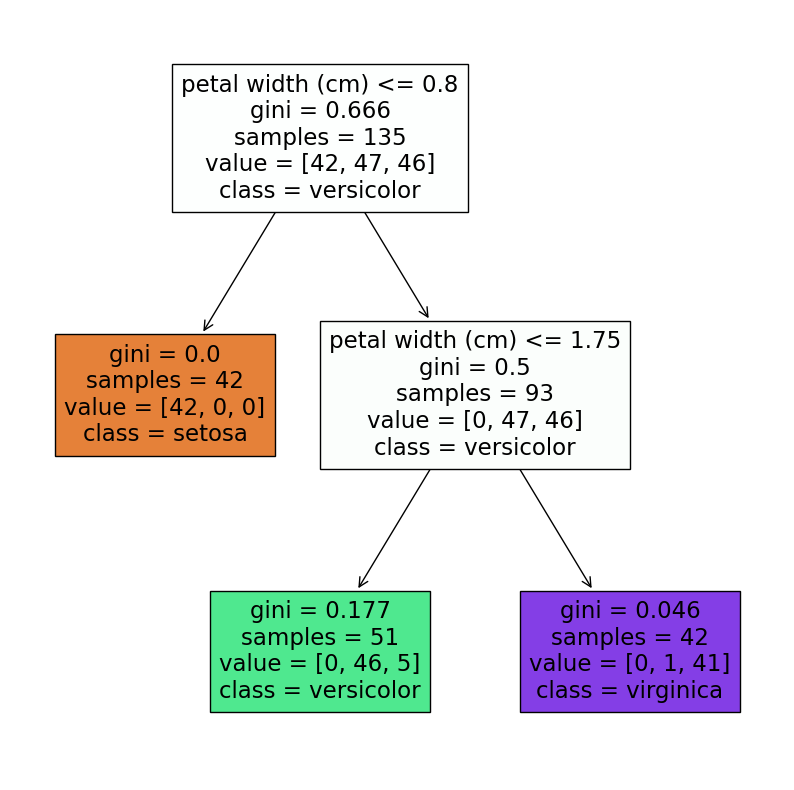

In [43]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[10,10])
plot_tree(clf, feature_names=x.columns, class_names=iris["target_names"], filled=True)

In [44]:
from sklearn.metrics import accuracy_score

#電腦模擬考
pre = clf.predict(x_test)

#對答案
accuracy_score(y_test, pre)

1.0